# DATA MINING

## Upload Data

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")
df.head()

Saving Datasets Superstore.xlsx to Datasets Superstore.xlsx


,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Eksplorasi Data

In [ ]:
df.info()
print("\nMissing values\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Visualisasi

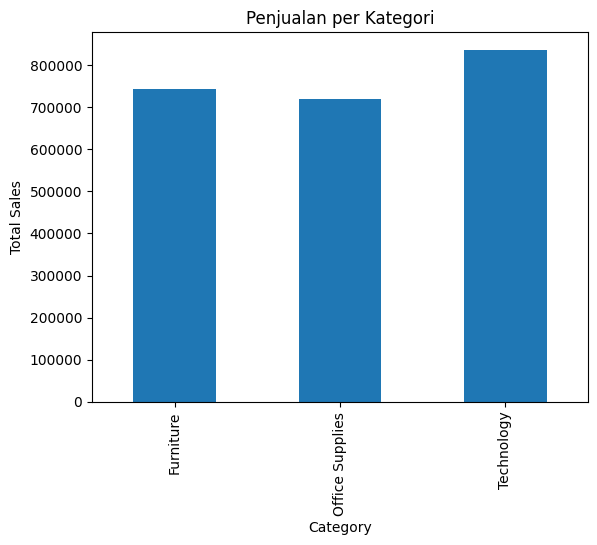

<function matplotlib.pyplot.show(close=None, block=None)>

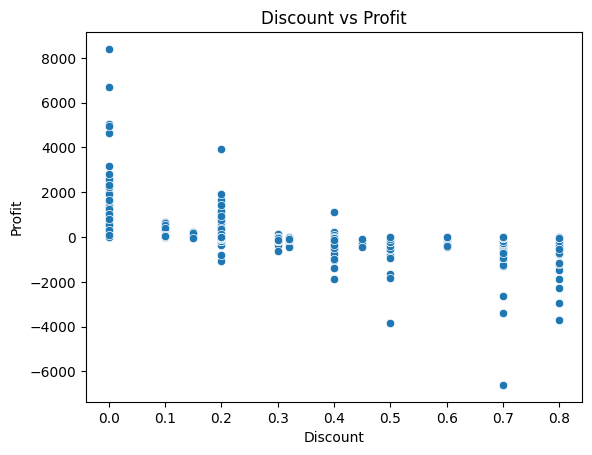

In [ ]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()

sns.scatterplot(data=df,x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show

## Klasifikasi Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix:
 [[ 441  106]
 [  96 2356]]


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\n=== KNN ===")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


=== KNN ===
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.36      0.46       547
           1       0.87      0.96      0.91      2452

    accuracy                           0.85      2999
   macro avg       0.76      0.66      0.69      2999
weighted avg       0.83      0.85      0.83      2999

Confusion Matrix:
 [[ 197  350]
 [ 109 2343]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== RANDOM FOREST ===")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== RANDOM FOREST ===
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       547
           1       0.96      0.97      0.96      2452

    accuracy                           0.94      2999
   macro avg       0.90      0.88      0.89      2999
weighted avg       0.94      0.94      0.94      2999

Confusion Matrix:
 [[ 439  108]
 [  83 2369]]


Ketiga model Decision Tree, K Nearest Neighbors (KNN), dan Random Forest dapat menghasilkan akurasi yang berbeda-beda karena cara mereka bekerja dalam memproses data dan membuat keputusan sangat berbeda satu sama lain.

Decision Tree: Model ini bekerja dengan membagi data menjadi beberapa bagian berdasarkan fitur tertentu. Setiap pembagian atau "node" pada pohon keputusan berusaha memisahkan data yang memiliki karakteristik yang berbeda (misalnya, apakah profit lebih besar dari 0 atau tidak). Namun, Decision Tree cenderung mudah terlalu mengikuti pola yang ada pada data latihan (overfitting), sehingga jika data baru yang diberikan sedikit berbeda, model ini bisa salah dalam memprediksi. Hal ini bisa menyebabkan akurasi lebih rendah pada data yang tidak terlihat selama pelatihan.

K-Nearest Neighbors (KNN): KNN bekerja dengan cara mencari data yang paling mirip (tetangga terdekat) dengan data yang ingin diprediksi. Kelemahan KNN adalah, jika data memiliki banyak noise atau fitur yang tidak relevan, model ini bisa menganggap data yang tidak sesuai sebagai tetangga terdekat, sehingga hasilnya bisa kurang akurat. Selain itu, KNN bisa melambat saat jumlah data sangat besar, dan hasilnya sangat tergantung pada pemilihan jumlah tetangga (k).

Random Forest: Berbeda dengan dua model di atas, Random Forest adalah gabungan banyak pohon keputusan (ensemble). Setiap pohon mencoba memprediksi berdasarkan bagian data yang berbeda, dan hasil akhir adalah hasil rata-rata dari semua pohon. Ini membuat Random Forest lebih stabil dan andal karena kesalahan satu pohon bisa dikoreksi oleh pohon lainnya. Random Forest lebih baik dalam mengatasi data yang kompleks dan cenderung memiliki akurasi yang lebih tinggi karena lebih mengurangi kemungkinan overfitting dibandingkan dengan Decision Tree.

# Kesimpulan

Random Forest lebih akurat karena bekerja dengan cara, tidak menggunakan satu decision tree untuk membuat keputusan, Random Forest menggabungkan banyak decision tree yang dibuat dari data yang berbeda-beda. Setiap tree ini mencoba memprediksi hasil secara terpisah, dan hasil akhirnya adalah gabungan dari semua tree tersebut. Ini membuat prediksi lebih akurat karena jika satu tree membuat kesalahan, tree lainnya bisa mengoreksi kesalahan tersebut. Selain itu, Random Forest juga mengurangi kemungkinan model terlalu terfokus pada data yang tidak relevan sehingga membuatnya lebih baik dalam menghadapi berbagai situasi data yang rumit. Jadi, Random Forest lebih pintar dan lebih stabil dalam memberikan hasil yang akurat.